In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("./input/stocks/AAPL.csv")
df

,Date,Symbol,LogReturn
0,2010-01-05,AAPL,0.001727
1,2010-01-06,AAPL,-0.016034
2,2010-01-07,AAPL,-0.001850
3,2010-01-08,AAPL,0.006626
4,2010-01-11,AAPL,-0.008861
...,...,...,...
3184,2022-08-29,AAPL,-0.013785
3185,2022-08-30,AAPL,-0.015424
3186,2022-08-31,AAPL,-0.010692
3187,2022-09-01,AAPL,0.004696


<AxesSubplot:>

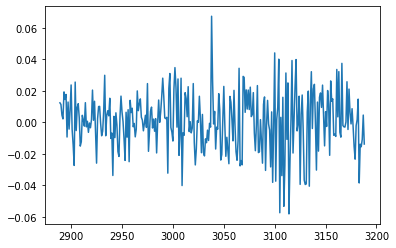

In [28]:
df["LogReturn"].tail(300).plot()

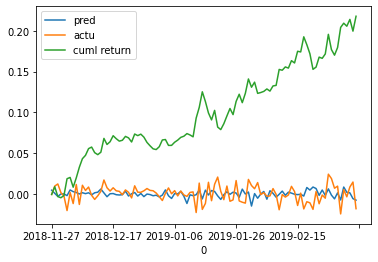

In [29]:
import json
with open("./out.json", "rt") as F:
    js = json.load(F)
left = list(map(lambda x: (x[0],x[1][0]),js.items()))
right = list(map(lambda x: (x[0], x[1][1]),js.items()))
mst = pd.merge(pd.DataFrame(left),pd.DataFrame(right),on=0).set_index(0)
mst.columns = ["pred","actu"]
mst.plot()
mst["sign"] = np.sign(mst["pred"])
mst["cumul"] = (mst["sign"] * mst["actu"]).cumsum()
mst["cumul"].plot(label="cuml return")
plt.legend()

<AxesSubplot:xlabel='0'>

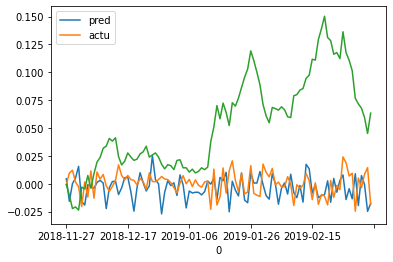

In [30]:
import json
with open("./out2.json", "rt") as F:
    js = json.load(F)
left = list(map(lambda x: (x[0],x[1][0]),js.items()))
right = list(map(lambda x: (x[0], x[1][1]),js.items()))
mst = pd.merge(pd.DataFrame(left),pd.DataFrame(right),on=0).set_index(0)
mst.columns = ["pred","actu"]
mst.plot()
mst["sign"] = np.sign(mst["pred"])
mst["cumul"] = (mst["sign"] * mst["actu"]).cumsum()
mst["cumul"].plot()